# Todas las respuestas a las preguntas detalladas en el ejercicio han sido respondidas a lo largo de todo el proceso elaborado en este Notebook

In [ ]:
!wget https://www.kaggle.com/datasets/thedevastator/gamestop-customer-reviews-dataset/gamestop_product_reviews_dataset_sample.csv
import sys
!{sys.executable} -m pip install contractions
!pip install spacy==3.2.1
!pip install emoji_extractor
from emoji_extractor.extract import Extractor
!python -m spacy download en_core_web_sm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip

--2024-04-28 16:52:28--  https://www.kaggle.com/datasets/thedevastator/gamestop-customer-reviews-dataset/gamestop_product_reviews_dataset_sample.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-28 16:52:28 ERROR 404: Not Found.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


--2024-04-28 16:53:50--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allzip’

allzip                  [  <=>               ]  94.61K   290KB/s    in 0.3s    

2024-04-28 16:53:51 (290 KB/s) - ‘allzip’ saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  


In [ ]:
# Instalar la fuente Noto Color Emoji
!apt-get install -y fonts-noto-color-emoji

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-noto-color-emoji
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,944 kB of archives.
After this operation, 11.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 fonts-noto-color-emoji all 2.042-0ubuntu0.22.04.1 [9,944 kB]
Fetched 9,944 kB in 2s (5,124 kB/s)
Selecting previously unselected package fonts-noto-color-emoji.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-noto-color-emoji_2.042-0ubuntu0.22.04.1_all.deb ...
Unpacking fonts-noto-color-emoji (2.042-0ubuntu0.22.04.1) ...
Setting up fonts-noto-color-emoji (2.042-0ubuntu0.22.04.1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import contractions
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

<ipython-input-3-67005c071543>:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

Pese a que es un análisis de sentimiento, no solo me voy a centrar en la limpieza de la columna relativa a las reviews, sino que aprovecharé para limpiar el resto de datos y extraer nuevas columnas por si pudiesen ser incluidas como extra features al modelo.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gamestop_product_reviews_dataset_sample.csv')

In [ ]:
dataset.head()

,index,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,...,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,NaN,...,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,yes: I recommend this product,NaN,...,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56
2,2,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a...,yes: I recommend this product,NaN,...,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229174444,178b3b03-2c56-5abc-a016-c74c2633c9c2,16/01/2022 16:17:56
3,3,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Weeto,Unbelievable picture quality!,I’ve only had my new Visio OLED65 mounted and ...,yes: I recommend this product,NaN,...,0,10 months ago,NaN,2.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229167959,16e925e3-1e59-537e-aa67-1675b613d351,16/01/2022 16:17:56
4,4,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,LexusSC400,Vizio OLED,The picture is very crisp and the blacks very ...,yes: I recommend this product,NaN,...,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229131414,bc017585-3bc1-5a37-9e58-f0bed6de9a72,16/01/2022 16:17:56


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4686 non-null   int64  
 1   url                 4686 non-null   object 
 2   name                4686 non-null   object 
 3   brand               4686 non-null   object 
 4   sku                 4686 non-null   int64  
 5   reviewer_name       4686 non-null   object 
 6   review_title        4621 non-null   object 
 7   review_description  4686 non-null   object 
 8   recommended_review  4686 non-null   object 
 9   verifed_purchaser   2406 non-null   object 
 10  helpful_count       4686 non-null   int64  
 11  not_helpful_count   4686 non-null   int64  
 12  reviewed_at         4686 non-null   object 
 13  images              166 non-null    object 
 14  rating              4686 non-null   float64
 15  average_rating      4686 non-null   float64
 16  review

In [ ]:
dataset.nunique()

index                 4686
url                    124
name                   124
brand                   70
sku                    124
reviewer_name         4452
review_title          3831
review_description    4684
recommended_review       2
verifed_purchaser        1
helpful_count           38
not_helpful_count       45
reviewed_at             57
images                 166
rating                   5
average_rating          92
reviews_count           72
reviews_link           543
comment_id            4686
uniq_id               4686
scraped_at              95
dtype: int64

In [ ]:
dataset.apply(lambda x: x.isna().sum()/len(dataset))

index                 0.000000
url                   0.000000
name                  0.000000
brand                 0.000000
sku                   0.000000
reviewer_name         0.000000
review_title          0.013871
review_description    0.000000
recommended_review    0.000000
verifed_purchaser     0.486556
helpful_count         0.000000
not_helpful_count     0.000000
reviewed_at           0.000000
images                0.964575
rating                0.000000
average_rating        0.000000
reviews_count         0.000000
reviews_link          0.000000
comment_id            0.000000
uniq_id               0.000000
scraped_at            0.000000
dtype: float64

Aquí vemos que la columna images tiene un altísimo grado de missings, habra que eliminar la columna ya que imputar un porcentaje tan alto es inviable.

Para verified_purchaser y review_title sin embargo, intentaremos usar tecnicas de imputación de cara a  sustituir esos missings por valores válidos para el modelo.

A continuación vamos a crear una nueva columna llamada emojis, la cual recogerá los emoticonos utilizados en las reviews. Podremos usar esta nueva variable como extra feature para el modelo.

In [ ]:
dataset["emojis"] = dataset["review_description"].apply(lambda x: extract_emojis(x))

In [ ]:
dataset["emojis"].value_counts()

emojis
[]     4680
[❤]       2
[⭐]       1
[☹]       1
[‼]       1
[™]       1
Name: count, dtype: int64

No parece que sea muy significativa, pero al menos tenemos localizados ciertos emoticonos que nos pueden ayudar a clasificar esos comentarios en específico.

# ANÁLISIS EXPLORATORIO DE LOS DATOS

In [ ]:
print("Tenemos un conjunto de {} documentos".format(len(dataset)))
print("El dataframe tiene {} columnas".format(dataset.shape[1]))

Tenemos un conjunto de 4686 documentos
El dataframe tiene 22 columnas


Vamos a ver como se comporta nuestra target respecto al resto de variables:

In [ ]:
print(dataset["rating"].value_counts())

# Número de elementos de cada clase:
dataset.groupby(['rating']).count()

rating
5.0    3089
4.0     892
1.0     284
3.0     272
2.0     149
Name: count, dtype: int64


,index,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,...,not_helpful_count,reviewed_at,images,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at,emojis
rating,,,,,,,,,,,,,,,,,,,,,
1.0,284,284,284,284,284,284,277,284,284,169,...,284,284,9,284,284,284,284,284,284,284
2.0,149,149,149,149,149,149,148,149,149,63,...,149,149,5,149,149,149,149,149,149,149
3.0,272,272,272,272,272,272,266,272,272,166,...,272,272,4,272,272,272,272,272,272,272
4.0,892,892,892,892,892,892,880,892,892,472,...,892,892,18,892,892,892,892,892,892,892
5.0,3089,3089,3089,3089,3089,3089,3050,3089,3089,1536,...,3089,3089,130,3089,3089,3089,3089,3089,3089,3089


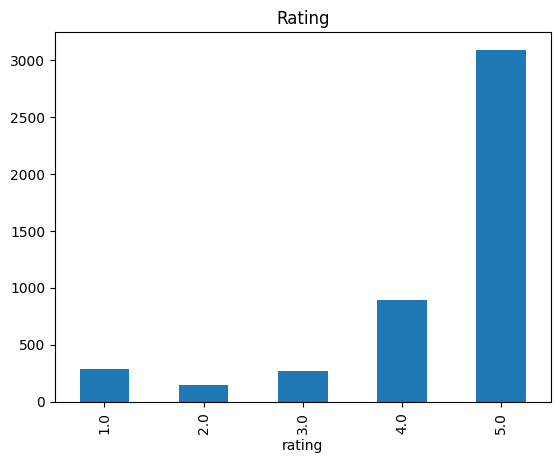

<Figure size 640x480 with 0 Axes>

In [ ]:
ax, fig = plt.subplots()
etiquetas = dataset.rating.value_counts().sort_index()
etiquetas.plot(kind= 'bar')
plt.title('Rating')
plt.figure(figsize=None)
plt.show()

Hay un claro desbalance de los datos.La clase 4 y 5 que más tarde se convertirá en la categoría "positiva" se lleva la gran mayoría de los registros de este dataset.

Mencionar también que el conjunto de datos tiene un número de registros muy limitado, habrá que ver como se comporta el modelo ante esto.

Se crea una función que nos permite generar un barplot para las variables categoricas y un histograma junto con un diagrama de caja para las variables numéricas, y se lo pasamos a ciertas columnas que me interesan ver cual es aproximadamente su distribución:

Columna: brand


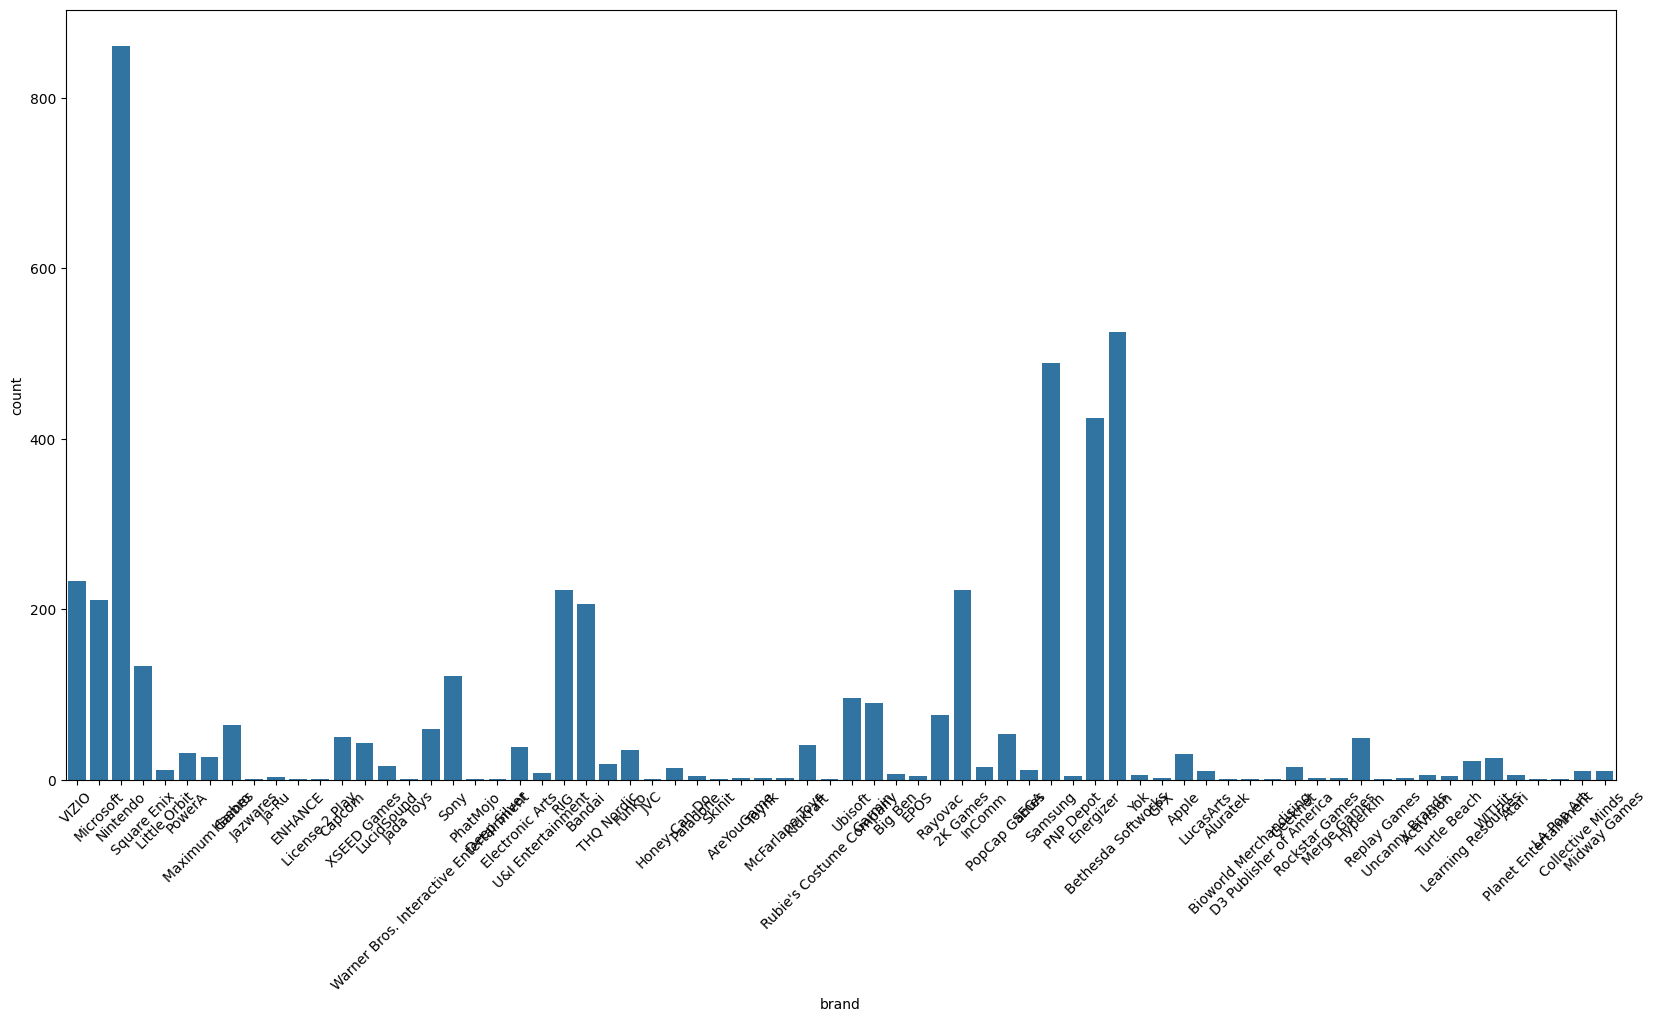

<Figure size 640x480 with 0 Axes>

Columna: sku


<Figure size 640x480 with 0 Axes>

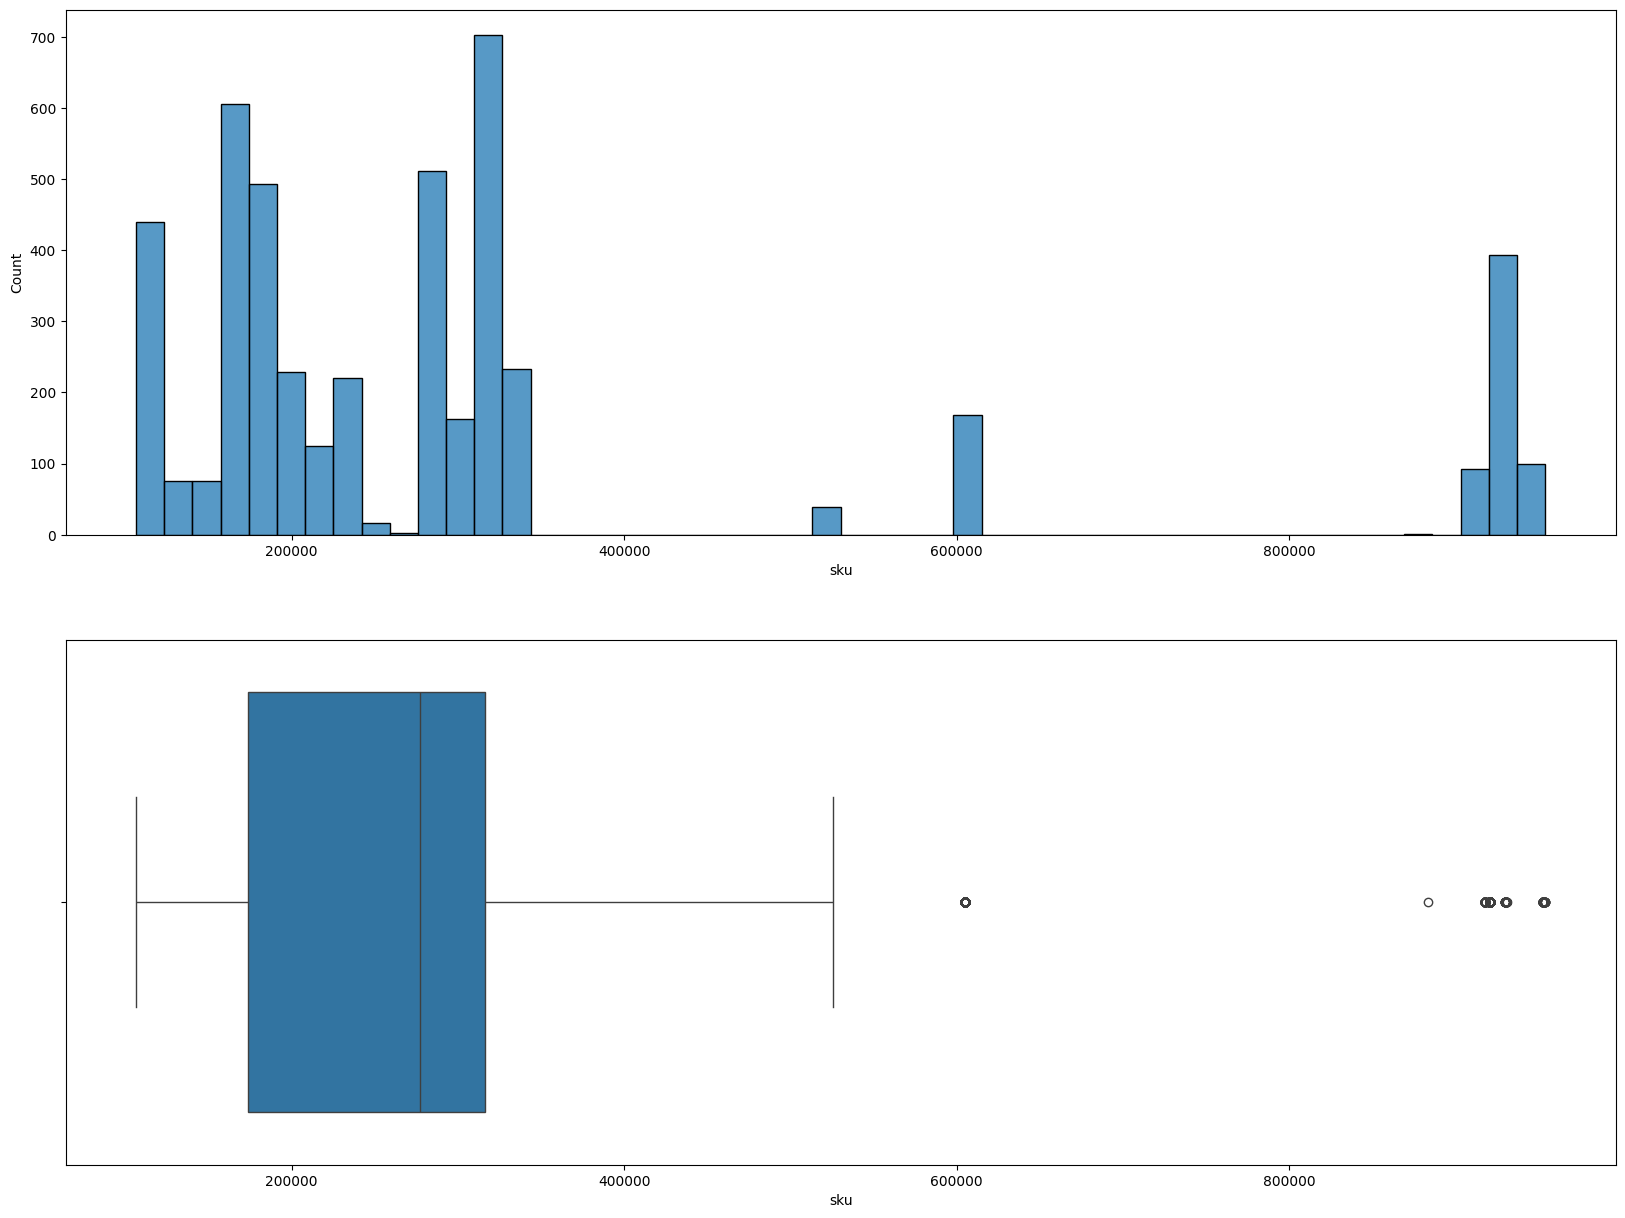

Columna: recommended_review


<Figure size 640x480 with 0 Axes>

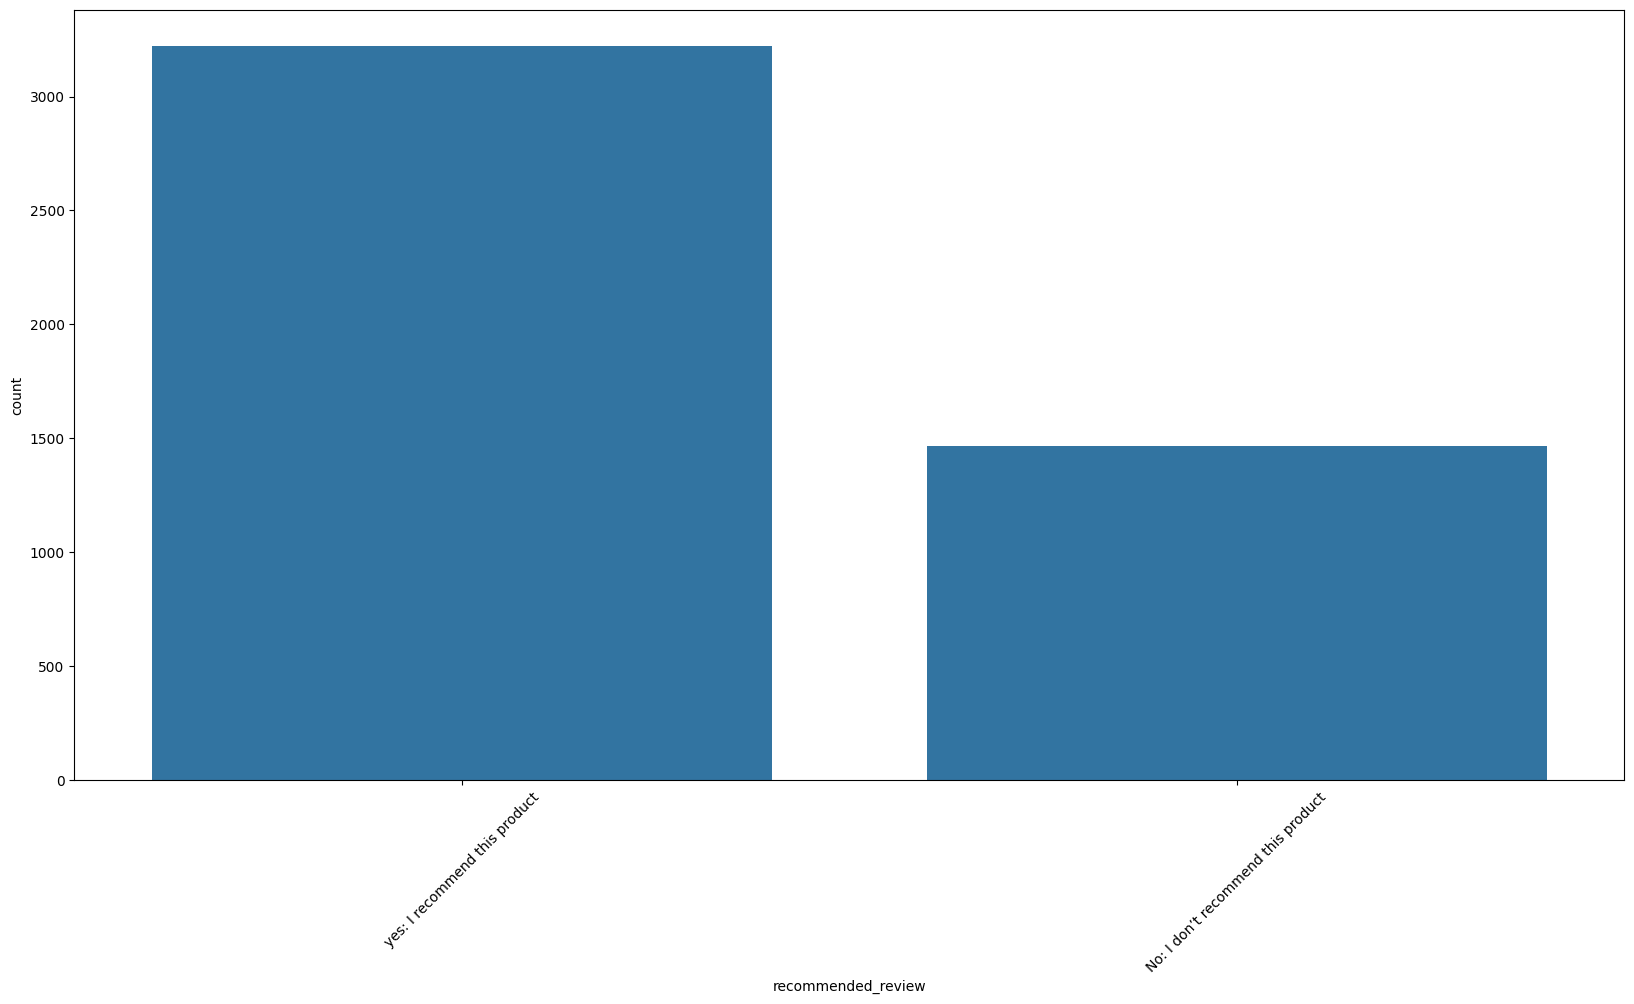

<Figure size 640x480 with 0 Axes>

Columna: helpful_count


<Figure size 640x480 with 0 Axes>

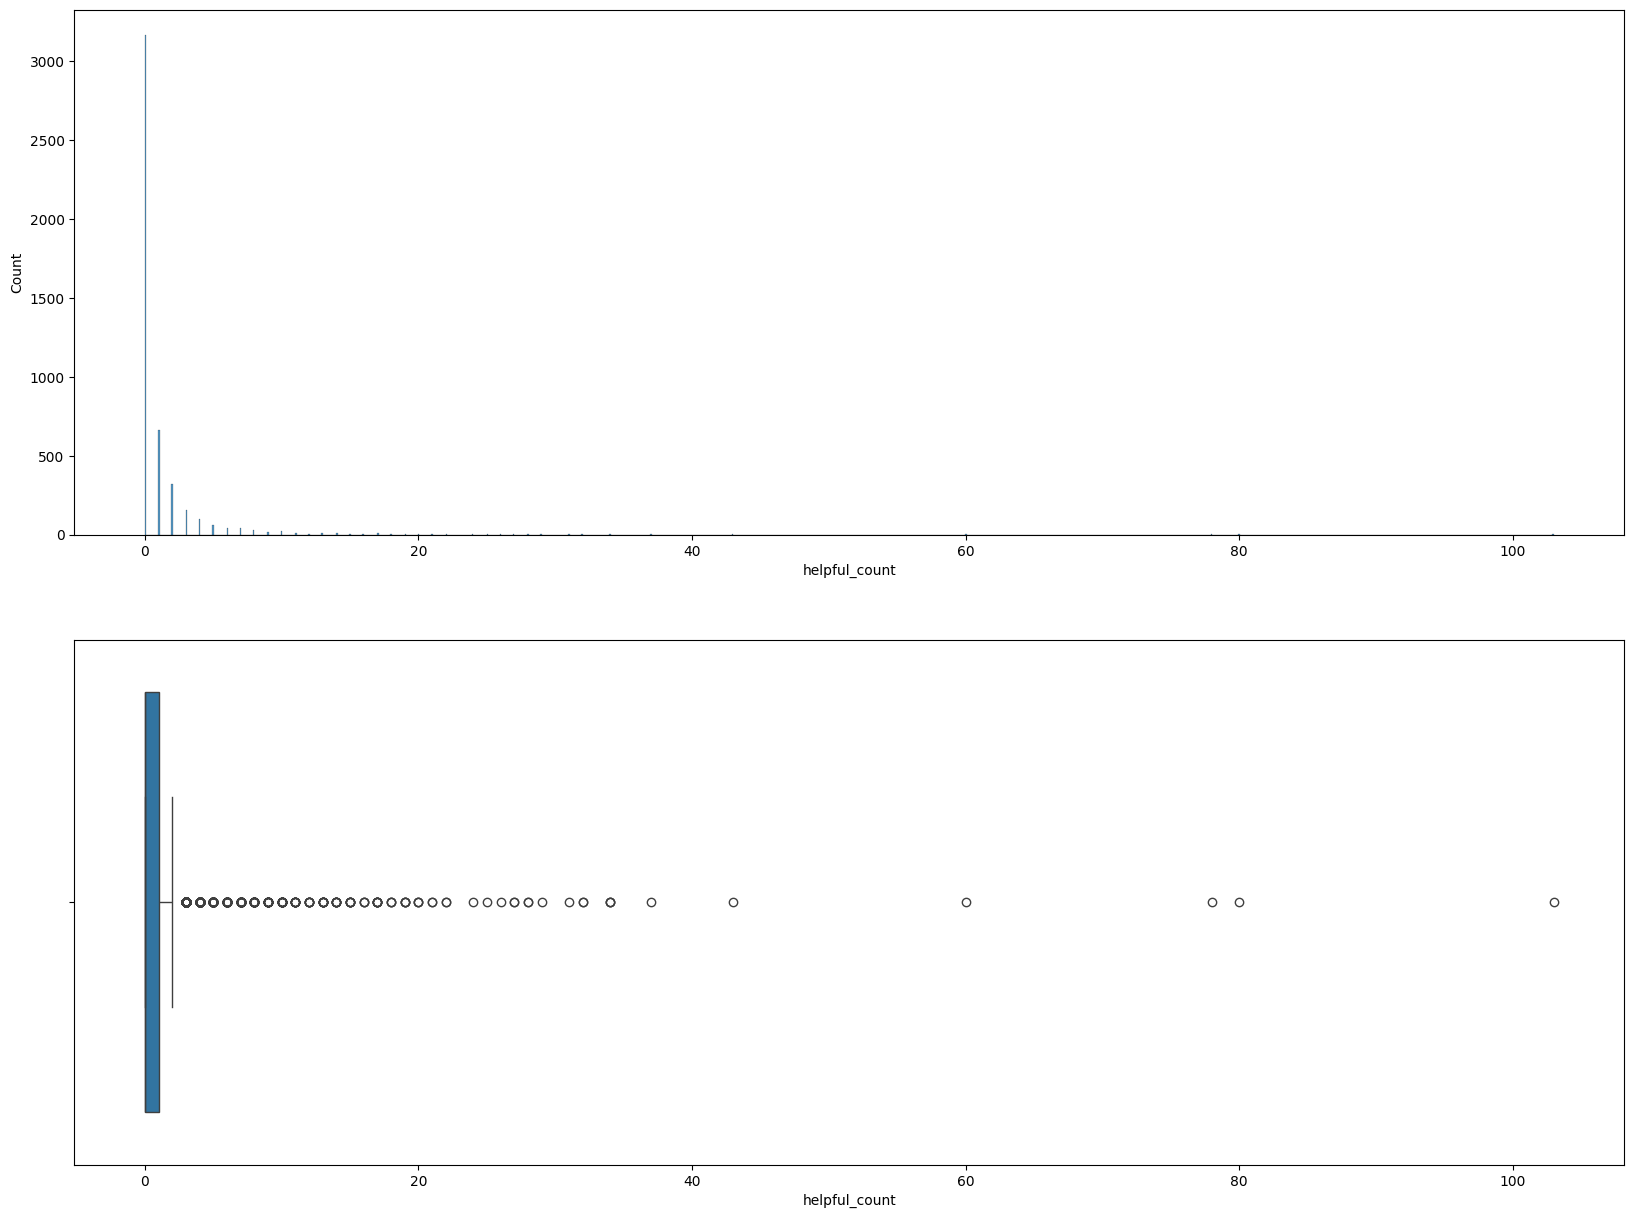

Columna: not_helpful_count


<Figure size 640x480 with 0 Axes>

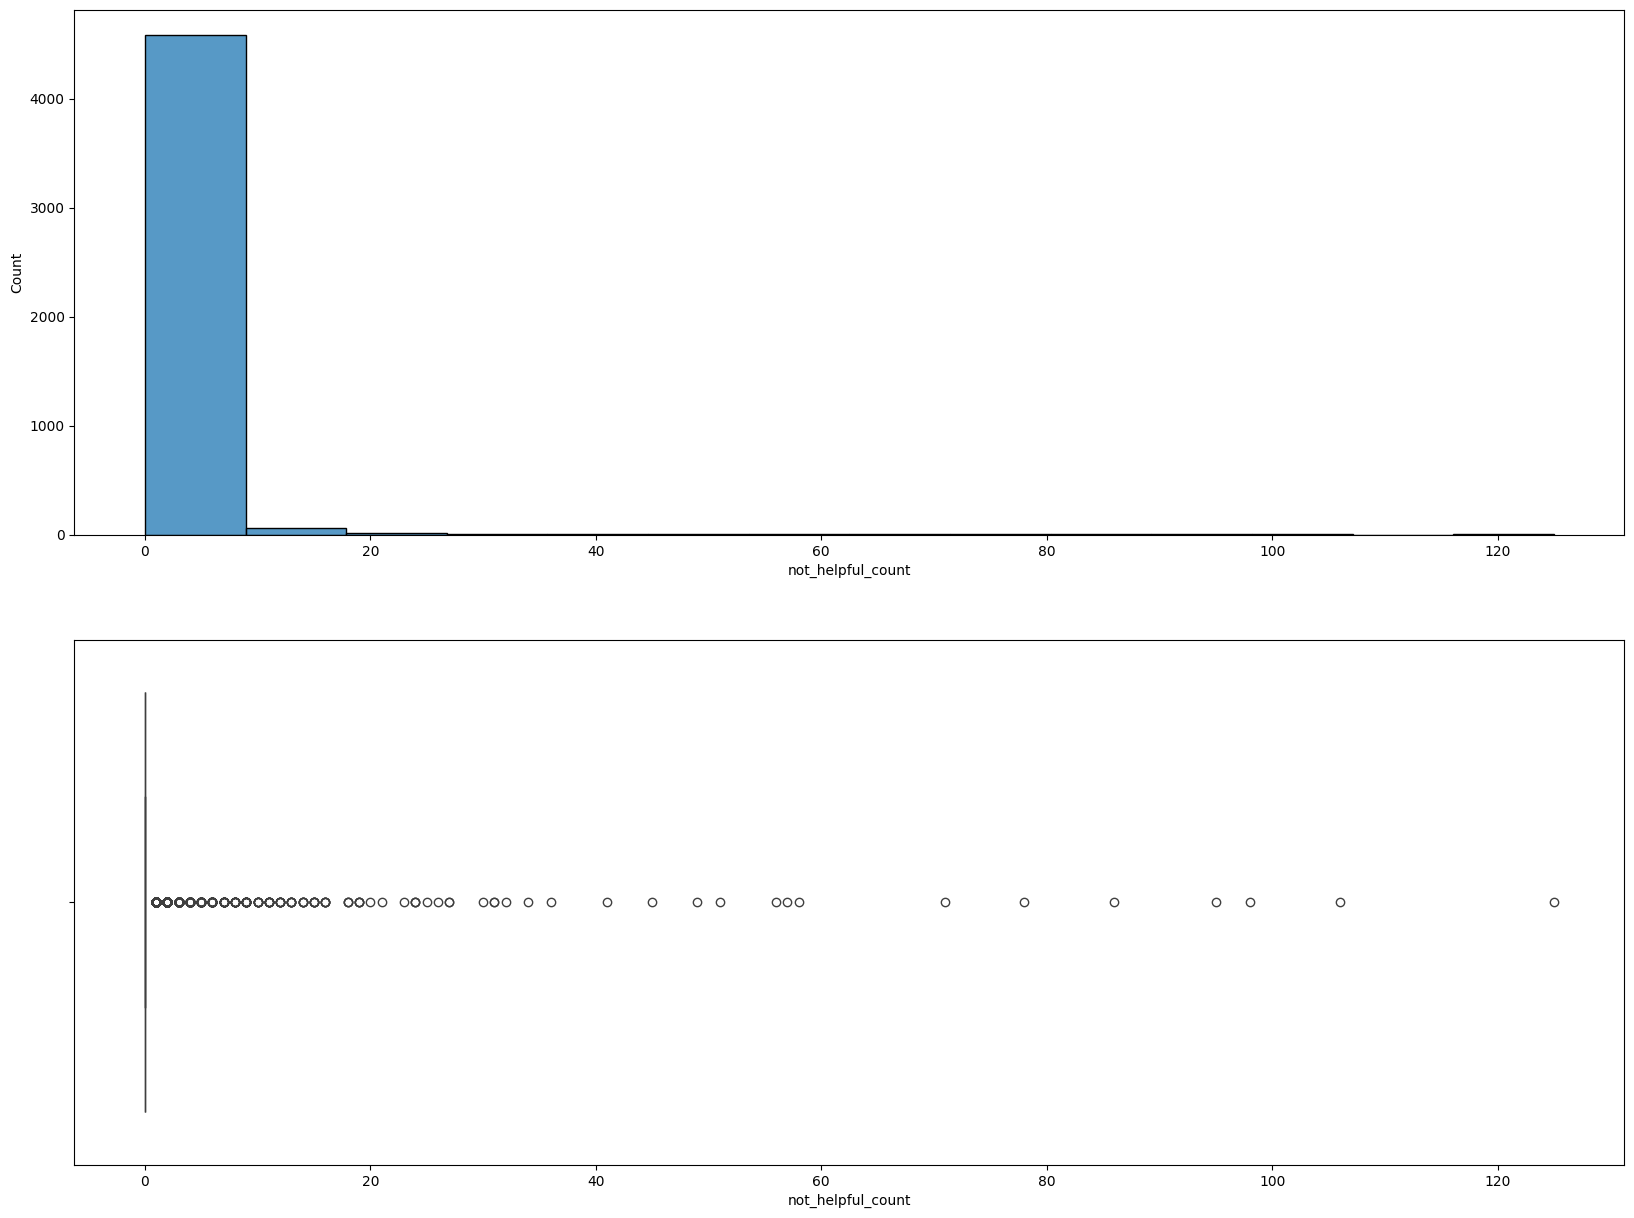

Columna: reviewed_at


<Figure size 640x480 with 0 Axes>

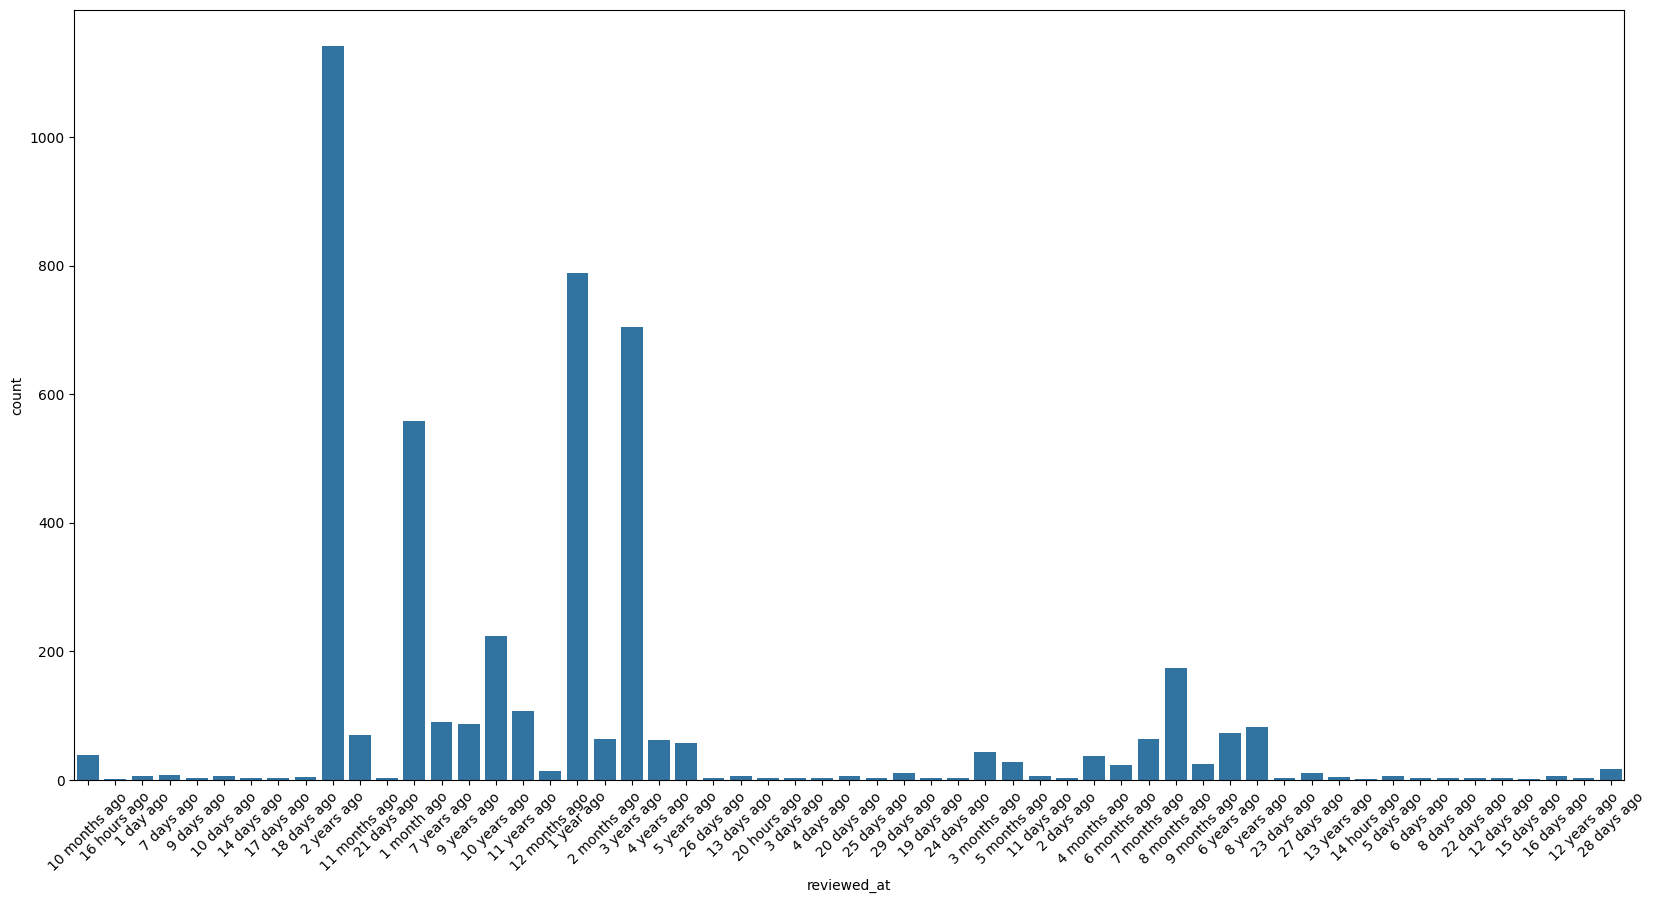

<Figure size 640x480 with 0 Axes>

Columna: average_rating


<Figure size 640x480 with 0 Axes>

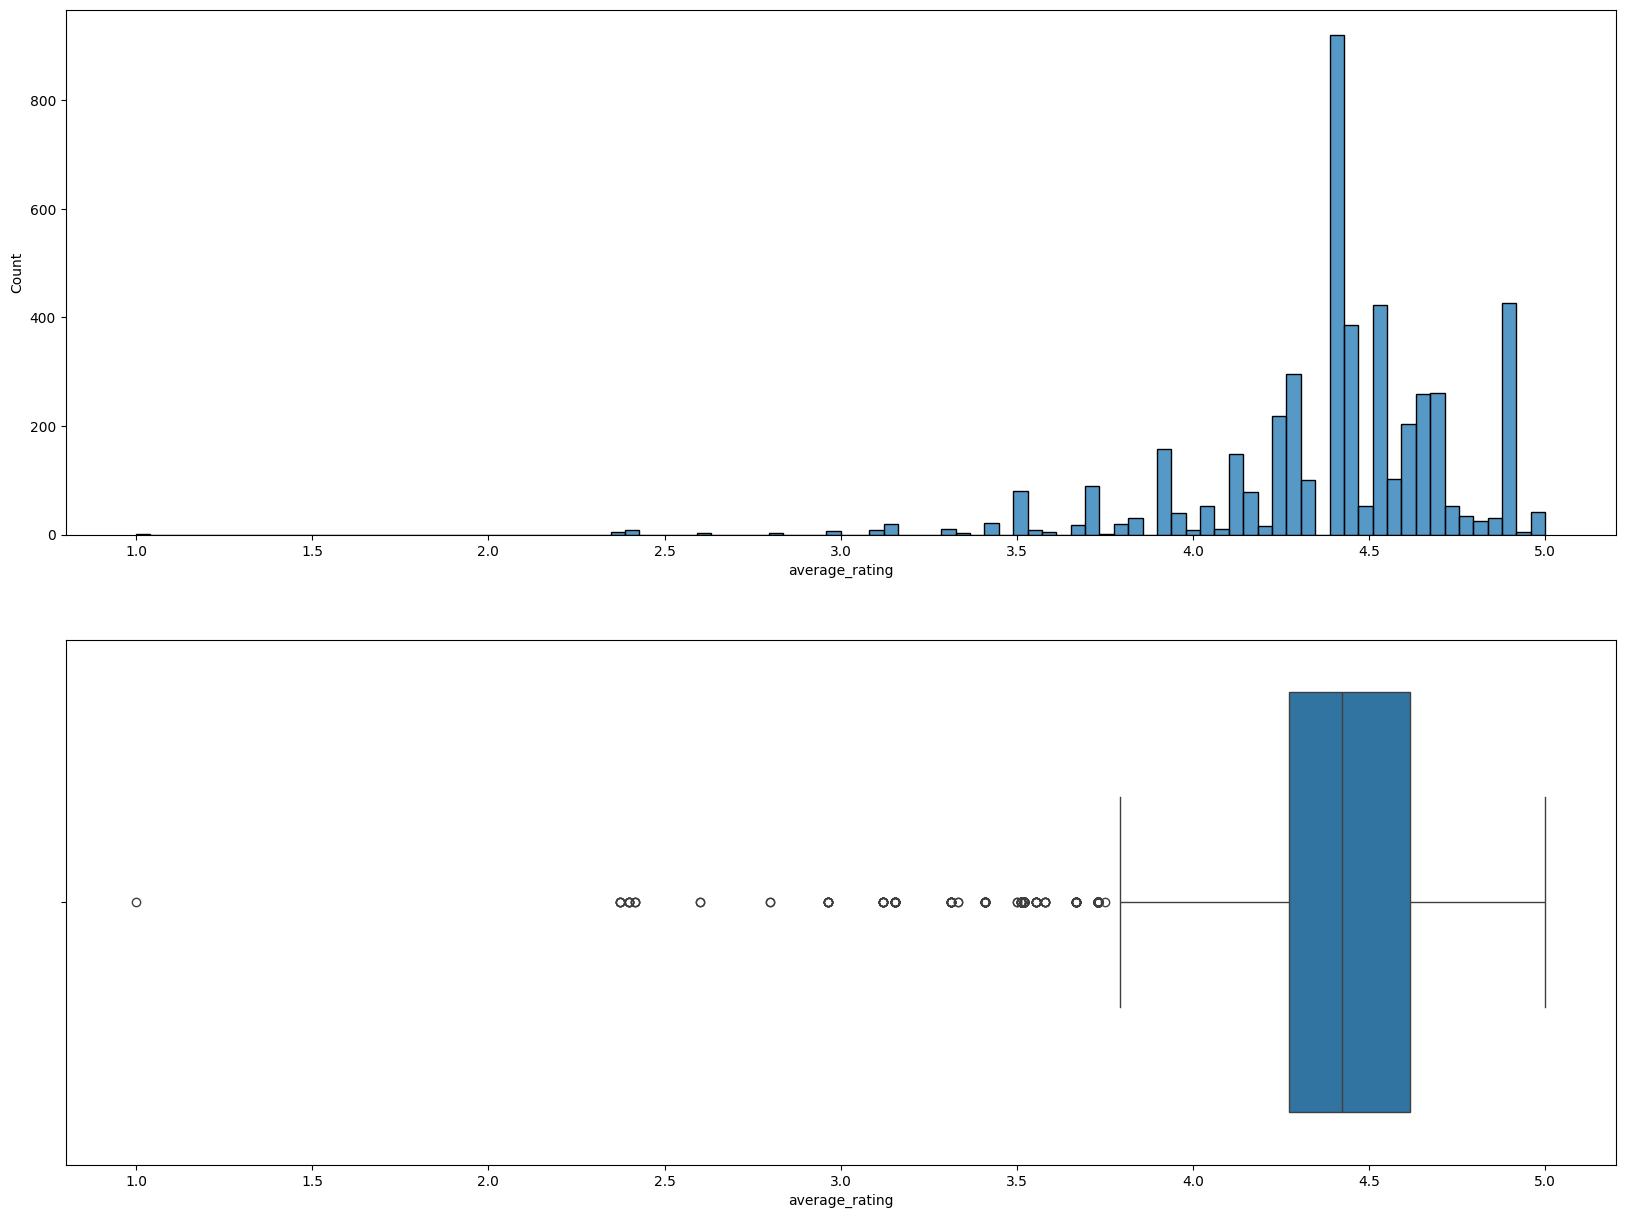

Columna: reviews_count


<Figure size 640x480 with 0 Axes>

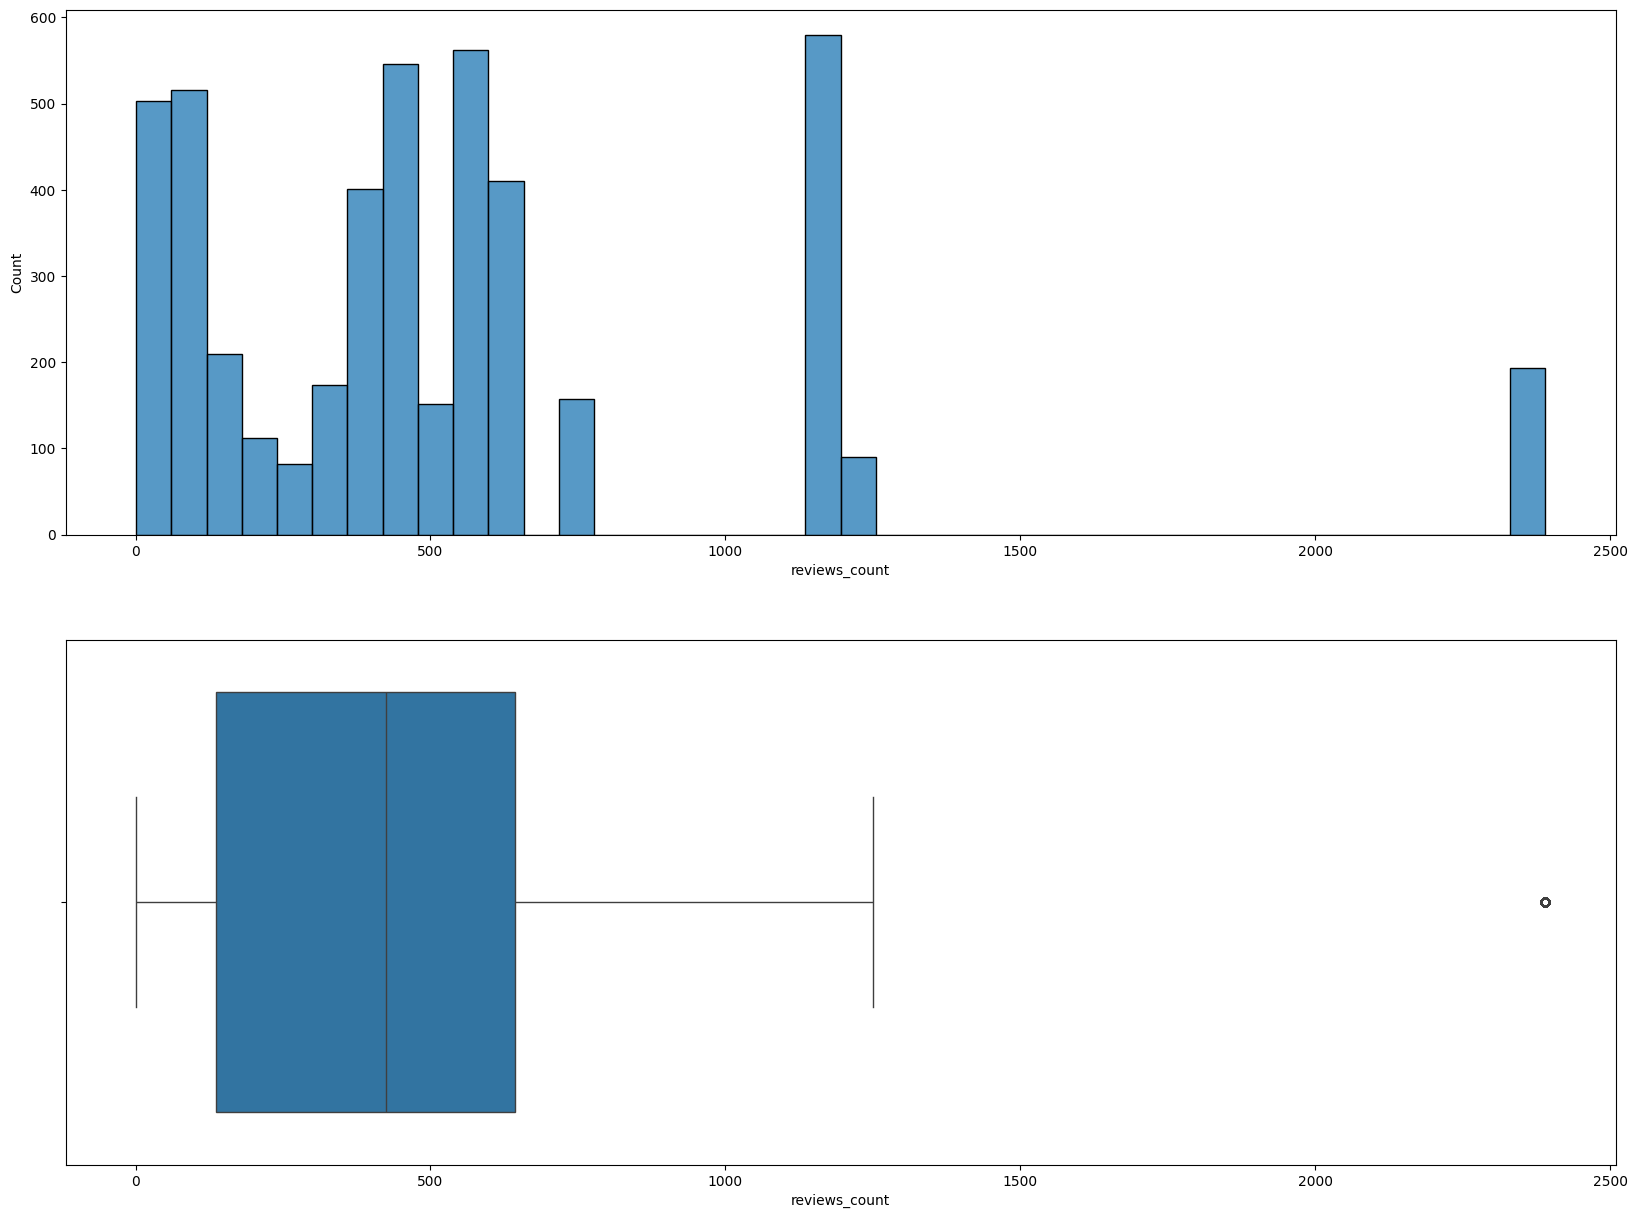

index                 None
url                   None
name                  None
brand                 None
sku                   None
reviewer_name         None
review_title          None
review_description    None
recommended_review    None
verifed_purchaser     None
helpful_count         None
not_helpful_count     None
reviewed_at           None
images                None
rating                None
average_rating        None
reviews_count         None
reviews_link          None
comment_id            None
uniq_id               None
scraped_at            None
emojis                None
dtype: object

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ploteable = ["brand","sku","recommended_review","verified_purchaser","helpful_count","not_helpful_count","reviewed_at","average_rating","reviews_count"]

def plot(col):
    if col.name in ploteable:
        print('Columna:', col.name)
        if col.dtype == 'object':
            fig, ax = plt.subplots(figsize=(20, 10))
            sns.countplot(data=dataset, x=col, ax=ax)
            ax.set_xlabel(col.name)
            plt.xticks(rotation=45)  # Rotar etiquetas x para mayor claridad si son largas
            plt.show()
            plt.figure(figsize=None)
        else:
            # Si la columna es numérica, traza un histograma y un boxplot
            fig, axes = plt.subplots(2, 1, figsize=(20, 15))
            sns.histplot(data=dataset, x=col, ax=axes[0])
            sns.boxplot(data=dataset, x=col, ax=axes[1])
            axes[1].set_xlabel(col.name)
        plt.show()
        plt.figure(figsize=None)

dataset.apply(plot)

Aquí se realizan 2 cosas:
 1. Se recategoriza la variable rating a lo que pide el ejercicio: negativo, neutro y positivo
 2. Creamos una nueva variable llamada char_len por si nos puede ayudar en el modelo aportando información adicional.

In [ ]:
dataset['rating'] = dataset['rating'].replace({1: 'negativo', 2: 'negativo', 3: 'neutro', 4: 'positivo', 5: 'positivo'})

In [ ]:
dataset["char_len"] = dataset["review_description"].apply(lambda x: len(x))

Se realiza un gráfico para poder ver si hay una correlación entre la longitud de caracteres y la tipología de la review, ya que podría existir una correlación entre la longitud de la review con un estado de ánimo negativo:

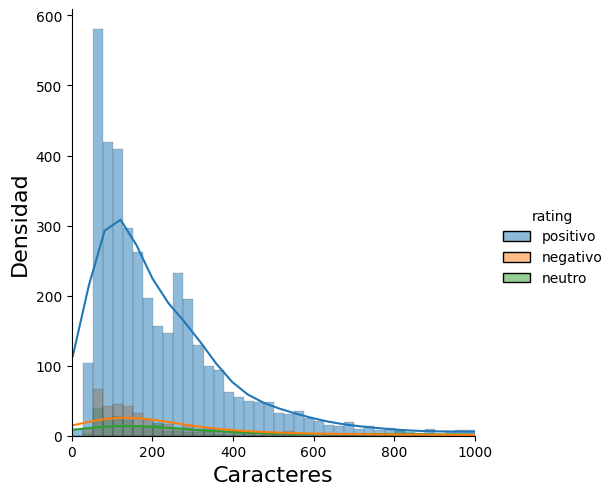

In [ ]:
# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("tab10")

sns.displot(data=dataset, x="char_len", hue="rating", kde=True, legend=True)
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.xlim(0,1000)

# Finalmente mostramos el gráfico:
plt.show()


Vemos que las distribuciones son mas o menos iguales, salvando la distancias debido al desbalance de los datos. Es decir, cada clase presenta una mayor cantidad de reviews entre 0 y 200 aproximadamente.

Por tener una idea inicial, vamos a generar un wordcloud as como un gráfico de las palabras más importantes para cada categoría del rating.

In [ ]:
from wordcloud import WordCloud

In [ ]:
txt_cat_neg = ",".join(dataset[dataset.rating=="negativo"].review_description.to_list())
txt_cat_neu = ",".join(dataset[dataset.rating=="neutro"].review_description.to_list())
txt_cat_pos = ",".join(dataset[dataset.rating=="positivo"].review_description.to_list())

In [ ]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)

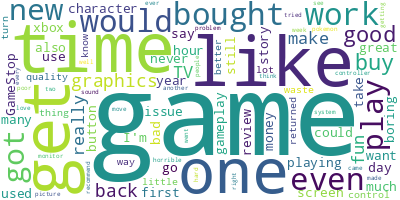

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat_neg)
# Visualizalo en una imagen
wordcloud.to_image()

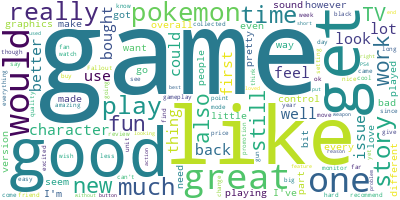

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat_neu)
# Visualizalo en una imagen
wordcloud.to_image()

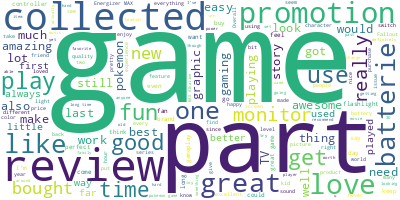

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat_pos)
# Visualizalo en una imagen
wordcloud.to_image()

No veo diferencias significativas entre gráficos, game está en todos como una palabra realmente importante. Si es cierto que entre positivo y neutro no visualizo grandes diferencias, pero con el negativo hay términos como time, even o work, los cuales pueden relacionarse a que los juegos le suponen un trabajo al individuo que hace la review, el uso de even para recalcar la negatividad del comentario y el uso del propio time en posibles frases como "waste of time".

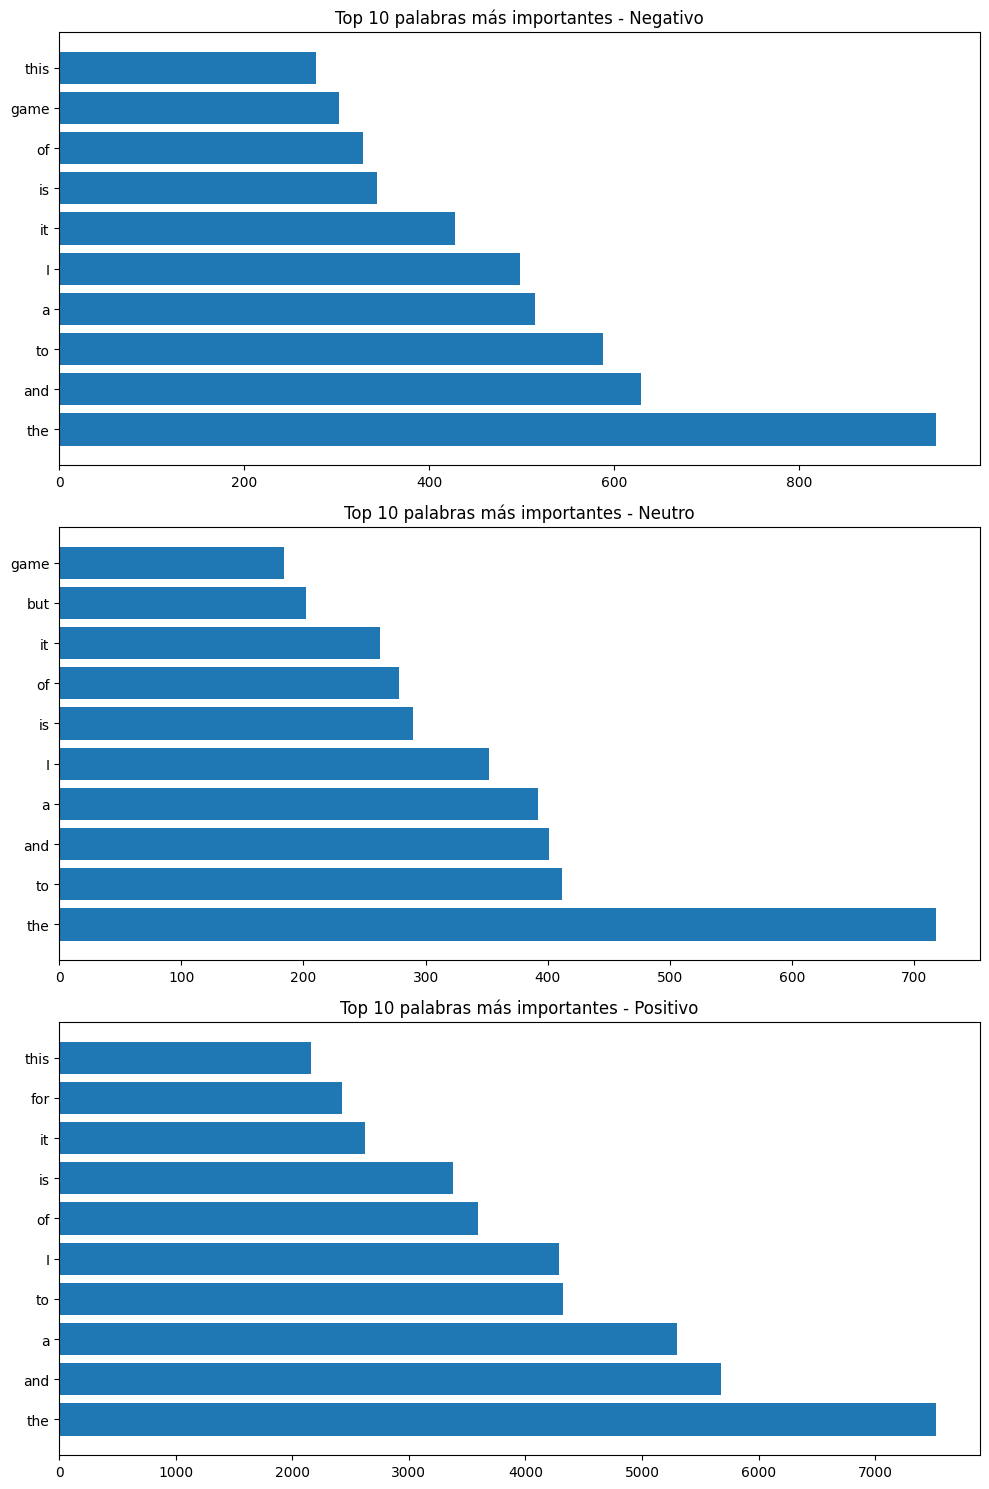

In [ ]:
from collections import Counter


word_freq_neg = Counter(txt_cat_neg.split())
word_freq_neu = Counter(txt_cat_neu.split())
word_freq_pos = Counter(txt_cat_pos.split())


top_words_neg = word_freq_neg.most_common(10)
top_words_neu = word_freq_neu.most_common(10)
top_words_pos = word_freq_pos.most_common(10)


fig, axs = plt.subplots(3, 1, figsize=(10, 15))


axs[0].barh(range(len(top_words_neg)), [val[1] for val in top_words_neg], align='center')
axs[0].set_yticks(range(len(top_words_neg)))
axs[0].set_yticklabels([val[0] for val in top_words_neg])
axs[0].set_title('Top 10 palabras más importantes - Negativo')


axs[1].barh(range(len(top_words_neu)), [val[1] for val in top_words_neu], align='center')
axs[1].set_yticks(range(len(top_words_neu)))
axs[1].set_yticklabels([val[0] for val in top_words_neu])
axs[1].set_title('Top 10 palabras más importantes - Neutro')


axs[2].barh(range(len(top_words_pos)), [val[1] for val in top_words_pos], align='center')
axs[2].set_yticks(range(len(top_words_pos)))
axs[2].set_yticklabels([val[0] for val in top_words_pos])
axs[2].set_title('Top 10 palabras más importantes - Positivo')

plt.tight_layout()
plt.show()

En cuanto a las palabras mas importantes, al no haber quitado stopwords ni preprocesado los textos de ninguna forma, hay mucha preprosición, determinantes y artículos que sirven de nexo entre palabras.

No pasa nada, en la parte de preprocesado volveré a realizar los wordcloud y este gráfico para poder ver realmente la importancia entre palabras.

In [ ]:
filas_con_icono = dataset[dataset['emojis'].apply(lambda x: len(x) >= 1)]
filas_sin_icono = dataset[dataset['emojis'].apply(lambda x: len(x) ==0)]

# Imprimir el resultado
print("Número de filas con al menos un icono:", len(filas_con_icono))
print("Número de filas sin iconos:", len(filas_sin_icono))

Número de filas con al menos un icono: 6
Número de filas sin iconos: 4680


# LIMPIEZA Y PREPROCESADO

Vamos a eliminar images debido a que presenta un 96% de missings

In [ ]:
dataset.drop("images",axis=1,inplace=True)

Creamos una función para extraer de las urls la categoría de cada producto (ej: ...com/electronics/... --> electronics). La incorporaremos como una nueva columna por si nos sirve de ayuda al modelo

In [ ]:
import re

def extract_category(url):
    # Patrón de expresión regular para encontrar la parte de la URL que contiene la categoría
    patron = r"(?:\.com/|\.es/|\.net/|\.org/)([^/]+)"

    # Buscar el patrón en la URL
    resultado = re.search(patron, url)

    if resultado:
        # Devolver la coincidencia encontrada
        return resultado.group(1)
    else:
        # Si no se encuentra coincidencia, devolver None
        return None

dataset["product_category"] = dataset["url"].apply(extract_category)

Eliminamos las columnas indicadas en el código de abajo ya que son links o _id, los cuales no entrarán a modelo.

In [ ]:
dataset.drop("index",axis=1,inplace=True)
dataset.drop("url",axis=1,inplace=True)
dataset.drop("reviews_link", axis=1, inplace=True)
dataset.drop("comment_id", axis=1, inplace=True)
dataset.drop("uniq_id", axis=1, inplace=True)

Vamos a dicotomizar recommended_review e imputaremos los Nan de verifed_purchaser con 0 ya que la columna es dicotómica pero para indicar si el usuario no esta verificado no se ha etiquetado como 0, sino que se ha optado por omitir el registro

Por último, hay muy pocos registros de review_title sin título, por lo que vamos a categorizar esos campos con 0 para indicar que no hay título de la review.

In [ ]:
dataset["recommended_review"] = dataset["recommended_review"].str.strip()
dataset["recommended_review"] = dataset["recommended_review"].replace({ "No: I don’t recommend this product":0, "yes: I recommend this product":1})

dataset["verifed_purchaser"] = dataset["verifed_purchaser"].fillna(0)
dataset["verifed_purchaser"] = dataset["verifed_purchaser"].replace({"Verified Purchaser":1})

dataset["review_title"] = dataset["review_title"].fillna("0")

Comprobamos si hemos dejado el dataset sin NaN:

In [ ]:
dataset.apply(lambda x: x.isna().sum()/len(dataset))

name                  0.0
brand                 0.0
sku                   0.0
reviewer_name         0.0
review_title          0.0
review_description    0.0
recommended_review    0.0
verifed_purchaser     0.0
helpful_count         0.0
not_helpful_count     0.0
reviewed_at           0.0
rating                0.0
average_rating        0.0
reviews_count         0.0
scraped_at            0.0
emojis                0.0
char_len              0.0
product_category      0.0
dtype: float64

Al igual que hemos hecho anteriormente, vamos a verificar si en review_title tenemos en aquellos registros que tengan texto si hay algún emoji y lo guardaremos en una nueva variable.

In [ ]:
dataset["emojis_title"] = dataset["review_title"].apply(lambda x: extract_emojis(x))

In [ ]:
dataset["emojis_title"].value_counts()

emojis_title
[]     4685
[⚠]       1
Name: count, dtype: int64

Solo 1, no muy significativo.

Generamos una nueva función que nos pase la columna reviewed_at a un conteo por días. Esta función aplicará una transformación a días multiplicando por 30 o por 365 en función si detecta la palabra month o year en el registro.

In [ ]:
# Función para convertir la cantidad de tiempo a días
dataset['reviewed_at'] = dataset['reviewed_at'].str.strip().apply(lambda x: x.split())

def to_days(fecha):

    quantity = int(fecha[0])

    unity = fecha[1]

    if unity == "months" or unity =="month":
        return quantity * 30
    elif unity == "years" or unity == "year":
        return quantity * 365
    else:
        return quantity


dataset['reviewed_at'] = dataset['reviewed_at'].apply(to_days)

In [ ]:
dataset['reviewed_at']

0        300
1        300
2        300
3        300
4        300
        ... 
4681    1095
4682     730
4683     730
4684     730
4685     730
Name: reviewed_at, Length: 4686, dtype: int64

Vamos a splitear la columna scraped_at en cinco columnas que sean días, meses, años, hora y tramo del día para generar 4 posibles variables que aporten a modelo.

In [ ]:
dataset['scraped_at'] = pd.to_datetime(dataset['scraped_at'], format='%d/%m/%Y %H:%M:%S')
# Días
dataset["scraped_day"] = dataset.scraped_at.apply(lambda x: x.strftime("%A"))
#Meses
dataset["scraped_month"] = dataset.scraped_at.apply(lambda x: x.strftime("%B"))
#Años
dataset['scraped_year'] = dataset['scraped_at'].dt.year
# Extraemos hora y aplicamos binning para saber en que franja horaria esta posteado el comentario
dataset["hour"] = dataset.scraped_at.apply(lambda x: int(x.hour))
dataset["hour_bin"] = pd.cut(dataset["hour"], bins = [-1,6,12,18,23], labels = ["Madrugada","Mañana","Tarde","Noche"])

dataset.drop("scraped_at", axis=1, inplace=True)

In [ ]:
dataset

,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,...,reviews_count,emojis,char_len,product_category,emojis_title,scraped_day,scraped_month,scraped_year,hour,hour_bin
0,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,0,My new OLED is a upgrade and it's great! This...,1,0,0,0,...,363,[],310,electronics,[],Sunday,January,2022,16,Tarde
1,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,1,0,0,0,...,363,[],262,electronics,[],Sunday,January,2022,16,Tarde
2,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a...,1,0,0,0,...,363,[],124,electronics,[],Sunday,January,2022,16,Tarde
3,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Weeto,Unbelievable picture quality!,I’ve only had my new Visio OLED65 mounted and ...,1,0,0,0,...,363,[],2058,electronics,[],Sunday,January,2022,16,Tarde
4,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,LexusSC400,Vizio OLED,The picture is very crisp and the blacks very ...,1,0,0,0,...,363,[],264,electronics,[],Sunday,January,2022,16,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,Mortal Kombat Vs. DC Universe - PlayStation 3,Midway Games,930223,Ash1986,Great game!,Super fun to play. Exactly what I wanted it to...,1,1,2,0,...,217,[],55,video-games,[],Sunday,January,2022,16,Tarde
4682,Forza Horizon 4 - Xbox One,Microsoft,173787,AarontheBarbarian,You Should Race to get This Game,I absolutely love this game. I consider myself...,0,1,0,0,...,1251,[],632,video-games,[],Sunday,January,2022,16,Tarde
4683,Forza Horizon 4 - Xbox One,Microsoft,173787,Edmo72,First time Forza owner,Love the game. First time owning a Forza game....,0,1,0,0,...,1251,[],175,video-games,[],Sunday,January,2022,16,Tarde
4684,Forza Horizon 4 - Xbox One,Microsoft,173787,m dumb,I give it a 9 out of ten. Best racer out there,Great game but more of the same. Graphics are ...,0,1,0,0,...,1251,[],90,video-games,[],Sunday,January,2022,16,Tarde


## NORMALIZACIÓN DE TEXTOS Y CARACTERÍSTICAS ADICIONALES
Vamos a proceder a normalizar los datos. Para ello vamos a generar pequeñas funciones que nos permitan:
- Eliminar espacios extra entre términos.
- Transformar a minúsculas.
- Reemplazar contracciones del inglés.
- Normalizar URLs y números por tokens comunes.
- Lematizar tokens, eliminar stopwords y eliminar sígnos de puntuación.

Importamos estas dos funciones que nos permiten quitar los espacios y transformar a minusculas para cada documento del corpus:

In [ ]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

In [ ]:
dataset["normalized"] = dataset["review_description"].progress_apply(lambda x: eliminar_espacios(x))
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: texto_to_lower(x))

  0%|          | 0/4686 [00:00<?, ?it/s]

  0%|          | 0/4686 [00:00<?, ?it/s]

Esta funcion que usa la librería contractions nos permite traducir las contracciones típicas del inglés a su significado natural (ej: OMG --> Oh my God / I´m --> I am)

In [ ]:
def replace_contraction(text):
    return contractions.fix(text, slang=True)

In [ ]:
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: replace_contraction(x))

  0%|          | 0/4686 [00:00<?, ?it/s]

Depués normalizamos URLs (tokens que comienzan por https:) y números.

In [ ]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento)

    # Reemplazar posibles URLs y números por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].isdigit():
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

In [ ]:
dataset["normalized"] = dataset["normalized"].progress_apply(lambda x: normalizar_tokens(x))

  0%|          | 0/4686 [00:00<?, ?it/s]

Por último llevamos a cabo la lematización y eliminación de puntuación y stopwords:

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar símbolos de puntuación y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [ ]:
dataset["preprocessed_text"] = dataset["normalized"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))

  0%|          | 0/4686 [00:00<?, ?it/s]

Ahora con nuestro corpus ya preprocesado y normalizado, vamos a repetir lo que hicimos al comienzo del ejercicio para ver los wordcloud y las 10 palabras más importantes por categoría:

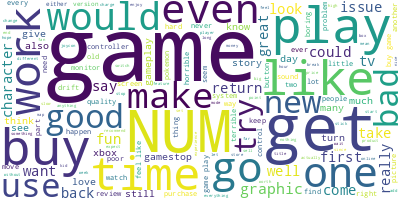

In [ ]:
txt_cat_neg = ",".join(dataset[dataset.rating=="negativo"].preprocessed_text.to_list())
txt_cat_neu = ",".join(dataset[dataset.rating=="neutro"].preprocessed_text.to_list())
txt_cat_pos = ",".join(dataset[dataset.rating=="positivo"].preprocessed_text.to_list())

# Genera el wordcloud
wordcloud.generate(txt_cat_neg)
# Visualizalo en una imagen
wordcloud.to_image()

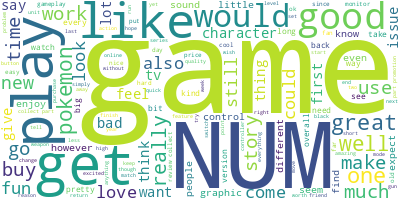

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat_neu)
# Visualizalo en una imagen
wordcloud.to_image()

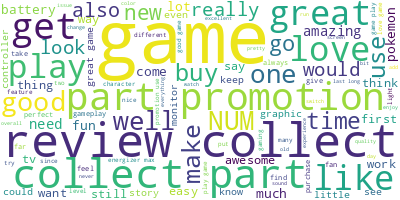

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat_pos)
# Visualizalo en una imagen
wordcloud.to_image()

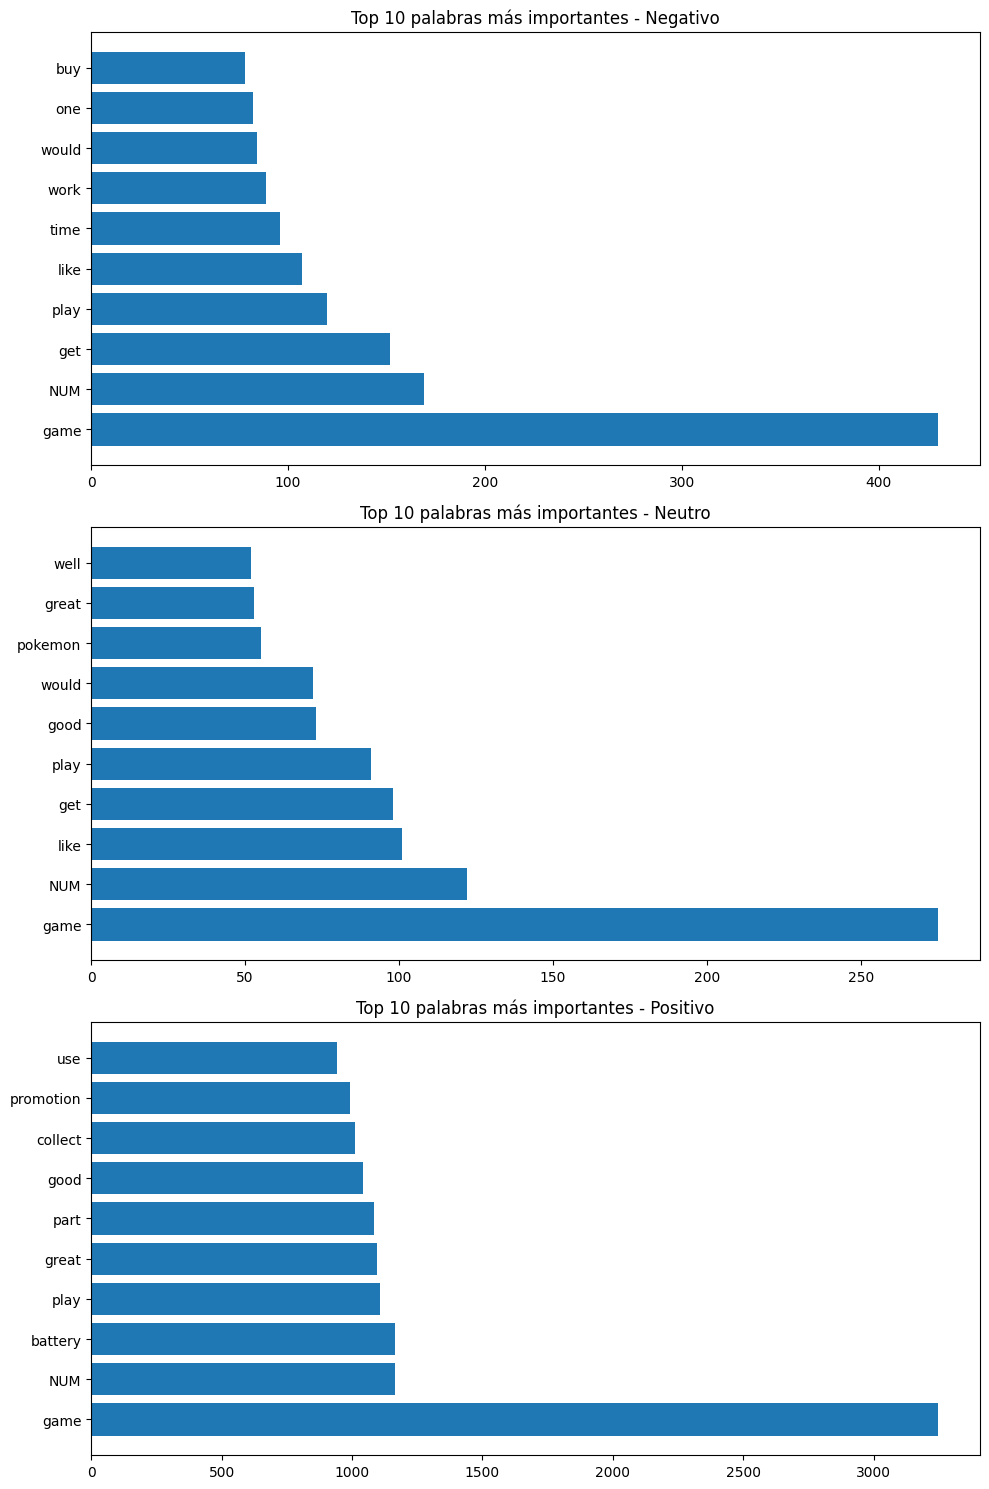

In [ ]:
from collections import Counter


word_freq_neg = Counter(txt_cat_neg.split())
word_freq_neu = Counter(txt_cat_neu.split())
word_freq_pos = Counter(txt_cat_pos.split())


top_words_neg = word_freq_neg.most_common(10)
top_words_neu = word_freq_neu.most_common(10)
top_words_pos = word_freq_pos.most_common(10)


fig, axs = plt.subplots(3, 1, figsize=(10, 15))


axs[0].barh(range(len(top_words_neg)), [val[1] for val in top_words_neg], align='center')
axs[0].set_yticks(range(len(top_words_neg)))
axs[0].set_yticklabels([val[0] for val in top_words_neg])
axs[0].set_title('Top 10 palabras más importantes - Negativo')


axs[1].barh(range(len(top_words_neu)), [val[1] for val in top_words_neu], align='center')
axs[1].set_yticks(range(len(top_words_neu)))
axs[1].set_yticklabels([val[0] for val in top_words_neu])
axs[1].set_title('Top 10 palabras más importantes - Neutro')


axs[2].barh(range(len(top_words_pos)), [val[1] for val in top_words_pos], align='center')
axs[2].set_yticks(range(len(top_words_pos)))
axs[2].set_yticklabels([val[0] for val in top_words_pos])
axs[2].set_title('Top 10 palabras más importantes - Positivo')

plt.tight_layout()
plt.show()

Aquí apreciamos mejor tanto en los wordcloud como en el gráfico de arriba las diferencias entre clases, aunque no sean muy significativas.

Game y NUM aparecen como las más representadas en cada clase, pero battery y promotion parecen tokens muy importantes y diferentes que nos pueden ayudar a clasificar los registros positivos. Hay términos como good que comparten semejanzas entre registros positivos y neutros, pero la clase negativa queda bien diferenciada de estas dos gracias a palabras como time, work o would.

Habra que ver de todas formas como de representativo es esto en el modelo debido al gran desbalanceo de los datos y los pocos registros que presenta en general el modelo.



Generamos la funcion token_appearance que nos ayudará a añadir dos columnas adicionales a nuestro dataset.

Estas columnas serán dicotómicas y se activarán cuando encuentren la presencia de un número o una URL.

In [ ]:
def token_appearance(document, token = "URL"):
  return len([x for x in document.split() if x == token])

In [ ]:
dataset["num_URLS"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["preprocessed_text"].progress_apply(lambda x: token_appearance(x, token="NUM"))

  0%|          | 0/4686 [00:00<?, ?it/s]

  0%|          | 0/4686 [00:00<?, ?it/s]

Con TextBlob, conseguiremos extraer la subjetividad y polaridad de nuestros textos preprocesados para generar dos variables adicionales que aporten significancia a modelo:

In [ ]:
from textblob import TextBlob
dataset["sent_subjectivity_str"] = dataset["preprocessed_text"].progress_apply(lambda x: TextBlob(x).sentiment.subjectivity)
dataset["sent_polarity_str"] = dataset["preprocessed_text"].progress_apply(lambda x: TextBlob(x).sentiment.polarity)

  0%|          | 0/4686 [00:00<?, ?it/s]

  0%|          | 0/4686 [00:00<?, ?it/s]

Aunque hay muy pocos emojis, he creado la funcion load_emoji_sentiment para extraer el sentimiento de los emojis que importaremos de Emoji-Sentimen-Data.

Después, habiendo calculado los scores para cada emoji, se emplea la función get_emoji_sentiment a la que si se le pasa una lista de emojis, es capaz de clasificar la positividad, neutralidad y negatividad de cada emoji en un rango del 0 al 1.

In [ ]:
# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

In [ ]:
emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

In [ ]:
def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e:
      continue

  if len(lista)>=1:
    longitud = len(lista)
  else:
    longitud =1
  return output/ longitud

In [ ]:
dataset["sent_emoji_pos"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "positive"))
dataset["sent_emoji_neu"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "neutral"))
dataset["sent_emoji_neg"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "negative"))

dataset["sent_emoji_pos"] = dataset["emojis_title"].apply(lambda x: get_emoji_sentiment(x, "positive"))
dataset["sent_emoji_neu"] = dataset["emojis_title"].apply(lambda x: get_emoji_sentiment(x, "neutral"))
dataset["sent_emoji_neg"] = dataset["emojis_title"].apply(lambda x: get_emoji_sentiment(x, "negative"))

Usamos TF-IDF teniendo en cuenta los siguientes aspectos:

* Considerar unigramas, bigramas y trigramas
* Que el sistema no considere los elementos que salgan en menos del 0.5% de los documentos

In [ ]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(dataset["preprocessed_text"])

In [ ]:
vector_data

<4686x868 sparse matrix of type '<class 'numpy.float64'>'
	with 87805 stored elements in Compressed Sparse Row format>

Aplicamos LabelEncoder a las variables de nuestro dataset mencionadas en la lista para dejar nuestros datos preparados para modelo.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = ["name","brand", "reviewer_name", "review_title","product_category","scraped_day","scraped_month","hour_bin"]

le = LabelEncoder()

# Itera sobre cada columna en label_encoder y aplica el LabelEncoder
for column in label_encoder:
    if column in dataset.columns:
        dataset[column] = le.fit_transform(dataset[column])

Extraemos nuestra variable objetivo:

In [ ]:
dataset["rating"] = dataset["rating"].replace({"negativo":0, "neutro":1, "positivo":2})
y = dataset["rating"].values.astype(np.float32)

Tras probar diferentes combinaciones, las extra_features que mejor se nos ajustan a modelo son las siguientes:

In [ ]:
extra_features = dataset[['product_category','recommended_review','num_NUM','num_URLS','sent_subjectivity_str','sent_polarity_str',
                          'sent_emoji_pos','sent_emoji_neg','sent_emoji_neu']]

Combinamos nuestro vector con nuestras extra_features

In [ ]:
import scipy as sp

X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    stratify = y)
print(X_train.shape)
print(X_test.shape)

(3514, 877)
(1172, 877)


Aplicamos un oversampling a las clases minoritarias con el fin de balancear el modelo, aunque adelanto que con los pocos datos que tiene el dataset de base (4686) y el gran desbalanceo que presenta de base, una de las clases no la predice bien.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy={0:3000,1:3000})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape)

(8985, 877)


Generamos una funcion que nos permita realizar validacion cruzada repetida a los modelos que le asignemos, y que nos imprima tanto el score que le indiquemos (trabajaré con accuracy) así como la desviación típica de los datos:

In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Establecemos los diferentes modelos a evaluar así como el score de evaluación (accuracy) y se los pasamos a la función anterior para que nos arrojen las métricas explicadas. Pretendo utilizar accuracy para evaluar inicialmente los modelos de una forma sencilla, pero realmente usaremos el f1-score para evaluar de manera individual cada modelo en siguientes pasos, ya que es más útil para cuando hay desbalance de clases.

Los datos introducidos sobre la función anterior serán los datos sin oversampling, pero evaluaremos posteriormente los modelos tanto con como sin oversampling para comparar sus métricas.

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression()),
         ("GaussianNB",GaussianNB()),
         ("RandomForest",RandomForestClassifier()),
         ("KNN", KNeighborsClassifier()),
         ("XGBoost", xgb.XGBClassifier())
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)

Metric: accuracy , KFold 
Logistic: 0.898695 (0.011537) 
Metric: accuracy , KFold 
GaussianNB: 0.540698 (0.019023) 
Metric: accuracy , KFold 
RandomForest: 0.890439 (0.008800) 
Metric: accuracy , KFold 
KNN: 0.889016 (0.006845) 
Metric: accuracy , KFold 
XGBoost: 0.889588 (0.012810) 


([array([0.89331437, 0.89900427, 0.90611664, 0.88051209, 0.91452991]),
  array([0.56187767, 0.55192034, 0.51920341, 0.51635846, 0.55413105]),
  array([0.88762447, 0.90042674, 0.89473684, 0.87482219, 0.89458689]),
  array([0.88762447, 0.90042674, 0.88762447, 0.87908962, 0.89031339]),
  array([0.89189189, 0.89331437, 0.89615932, 0.86486486, 0.9017094 ])],
 ['Logistic', 'GaussianNB', 'RandomForest', 'KNN', 'XGBoost'])

# VALIDACIÓN DE MODELOS

In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
# Con OVERSAMPLING
model=xgb.XGBClassifier()
model.fit(X_train_resampled,y_train_resampled)
# Sin OVERSAMPLING
model2=xgb.XGBClassifier()
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
# Con OVERSAMPLING
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# Con OVERSAMPLING
y_pred = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 76   9  23]
 [ 21  10  37]
 [ 29  11 956]]
              precision    recall  f1-score   support

         0.0       0.60      0.70      0.65       108
         1.0       0.33      0.15      0.20        68
         2.0       0.94      0.96      0.95       996

    accuracy                           0.89      1172
   macro avg       0.63      0.60      0.60      1172
weighted avg       0.87      0.89      0.88      1172

[[ 71   5  32]
 [ 17   5  46]
 [ 22   4 970]]
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.65       108
         1.0       0.36      0.07      0.12        68
         2.0       0.93      0.97      0.95       996

    accuracy                           0.89      1172
   macro avg       0.64      0.57      0.57      1172
weighted avg       0.87      0.89      0.87      1172



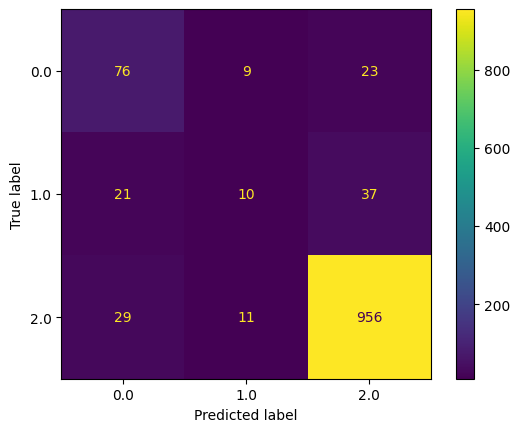

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

In [ ]:
model=RandomForestClassifier()
model.fit(X_train_resampled,y_train_resampled)

model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

y_pred = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 74   3  31]
 [ 23   4  41]
 [ 24   9 963]]
              precision    recall  f1-score   support

         0.0       0.61      0.69      0.65       108
         1.0       0.25      0.06      0.10        68
         2.0       0.93      0.97      0.95       996

    accuracy                           0.89      1172
   macro avg       0.60      0.57      0.56      1172
weighted avg       0.86      0.89      0.87      1172

[[ 65   1  42]
 [ 13   0  55]
 [ 10   0 986]]
              precision    recall  f1-score   support

         0.0       0.74      0.60      0.66       108
         1.0       0.00      0.00      0.00        68
         2.0       0.91      0.99      0.95       996

    accuracy                           0.90      1172
   macro avg       0.55      0.53      0.54      1172
weighted avg       0.84      0.90      0.87      1172



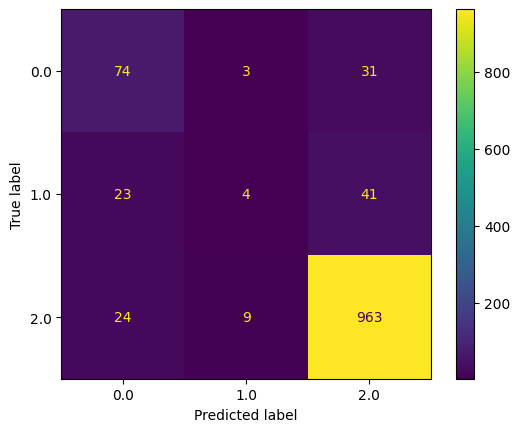

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

In [ ]:
model=LogisticRegression()
model.fit(X_train_resampled,y_train_resampled)

model2=LogisticRegression()
model2.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

y_pred = model2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 80  21   7]
 [ 30  17  21]
 [ 45  84 867]]
              precision    recall  f1-score   support

         0.0       0.52      0.74      0.61       108
         1.0       0.14      0.25      0.18        68
         2.0       0.97      0.87      0.92       996

    accuracy                           0.82      1172
   macro avg       0.54      0.62      0.57      1172
weighted avg       0.88      0.82      0.85      1172

[[ 76   2  30]
 [ 21   1  46]
 [ 16   1 979]]
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       108
         1.0       0.25      0.01      0.03        68
         2.0       0.93      0.98      0.95       996

    accuracy                           0.90      1172
   macro avg       0.62      0.57      0.56      1172
weighted avg       0.87      0.90      0.88      1172



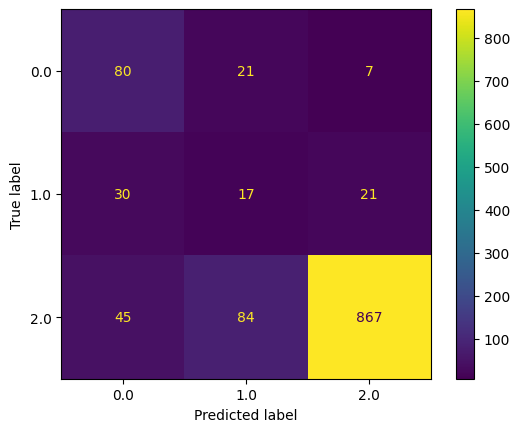

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

En base a lo analizado en el notebook, entre todos los modelos realizados me quedaría con el XGBoost con oversampling sobre los datos de training a las clases minoritarias (0 y 1).

Como métrica de evaluación escogería el f1-score, ya que es realmente útil para datos desbalanceados en problemas de clasificación, siendo este la media armónica de precision y recall, ponderando ambos valores en un solo estimador.

Antes de analizar los resultados, hay que contar con que el dataset no tiene los datos suficientes como para elaborar un modelo de clasificación basado en análisis de sentimiento debido a que solo presenta unos 4600 registros aproximadamente, sumado al hecho de que el desbalanceo de las clases es demasiado exagerado, quedando 4000 datos en la clase positiva y los apenas restantes repartidos entre las clases negativas y neutras.
Teniendo esto en cuenta, y aplicando oversampling así como la incorporación de características adicionales al texto, he conseguido un f1-score del 0,65 y 0,95 para la clase 0 y 2 respectivamente (negativo y positivo). De la clase mayoritaria era de esperar ya que contábamos con los suficientes registros, pero gracias al oversampling se ha podido llegar a un f1 decente para los pocos datos disponibles en esta clase. Sin embargo, y como era de esperar, la clase 1 (neutro) cuenta con menos registros que la negativa, por lo que el modelo le cuesta de por si identificar los comentarios, ya que además comparte similitudes en los tokens junto con la clase positiva (en la matriz de confusión se puede ver como la mayoría de los mal clasificados de esta clase se encuentran en la clase 2), llegando únicamente a un f1-score del 0,20.

En resumen, el modelo es capaz de clasificar de forma relativamente aceptable entre las clases 0 y 2, con una clara tendencia sobre la clase mayoritaria, pero muestra unas capacidades pobres hacia la clase neutral. Seguramente con un volumen de datos mayor y no tan desbalanceado, este modelo pueda ser mejorado y predecir correctamente las 3 clases.


## (ANEXO) TUNEO DE HIPERPARÁMETROS

NO EJECUTAR. Simplemente es código de ejemplo para poder establecer los mejores hiperparámetros del modelo. Ejecutando la caja inferior a este texto, el código tratará de encontrar los mejores hiperparámetros posibles para el modelo XGBoost en base a los indicadores establecidos.


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb

model = xgb.XGBClassifier()

params = {
    'learning_rate': [0.1, 0.01, 0.001],          # Tasa de aprendizaje
    'n_estimators': [100, 200, 300],              # Número de árboles en el ensamble
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1, error_score=0)
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros encontrados:", best_params)
print("Mejor puntuación (accuracy):", best_score)



Mejores parámetros encontrados: {'learning_rate': 0.1, 'n_estimators': 300}
Mejor puntuación (accuracy): 0.9659432387312187


Aquí se establecerían dentro del modelo XGBoost los parámetros arrojados por el código de la caja superior, se ajustarían a nuestros datos de training con oversampling y posteriormente se realizaría la predicción a los datos de test.

In [ ]:
model=xgb.XGBClassifier(learning_rate = 0.1 ,n_estimators = 300 )
model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 74  11  23]
 [ 19   8  41]
 [ 30  13 953]]
              precision    recall  f1-score   support

         0.0       0.60      0.69      0.64       108
         1.0       0.25      0.12      0.16        68
         2.0       0.94      0.96      0.95       996

    accuracy                           0.88      1172
   macro avg       0.60      0.59      0.58      1172
weighted avg       0.87      0.88      0.87      1172



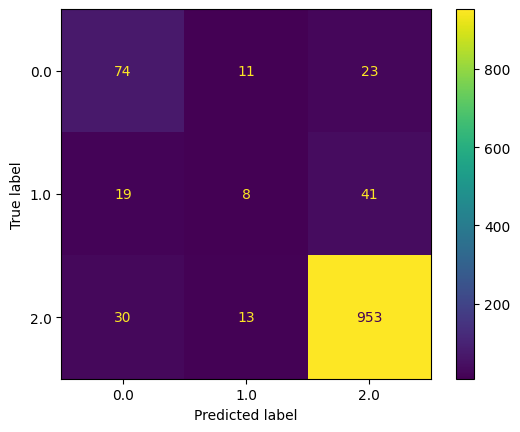

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)